## High Mountain Asia- Sentinel 1 Data

In [1]:
import xarray as xr
import contextily as ctx  #(to retrieve and write to disk tile maps from the internet into geospatial raster files)
import rasterio as rio
import rioxarray as rxr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#fns='/Users/bareeramirza/Downloads/snd_20160807.nc','/Users/bareeramirza/Downloads/snd_20160809.nc', '/Users/bareeramirza/Downloads/snd_20160811.nc'


In [3]:
import glob

fn = sorted(glob.glob('/Users/bareeramirza/Downloads/Netcdffiles/snd_*.nc'))
fns = fn[0:7]
for fn in fns:
    print(fn)

/Users/bareeramirza/Downloads/Netcdffiles/snd_20160807.nc
/Users/bareeramirza/Downloads/Netcdffiles/snd_20160809.nc
/Users/bareeramirza/Downloads/Netcdffiles/snd_20160811.nc
/Users/bareeramirza/Downloads/Netcdffiles/snd_20160812.nc
/Users/bareeramirza/Downloads/Netcdffiles/snd_20160814.nc
/Users/bareeramirza/Downloads/Netcdffiles/snd_20160817.nc
/Users/bareeramirza/Downloads/Netcdffiles/snd_20160831.nc


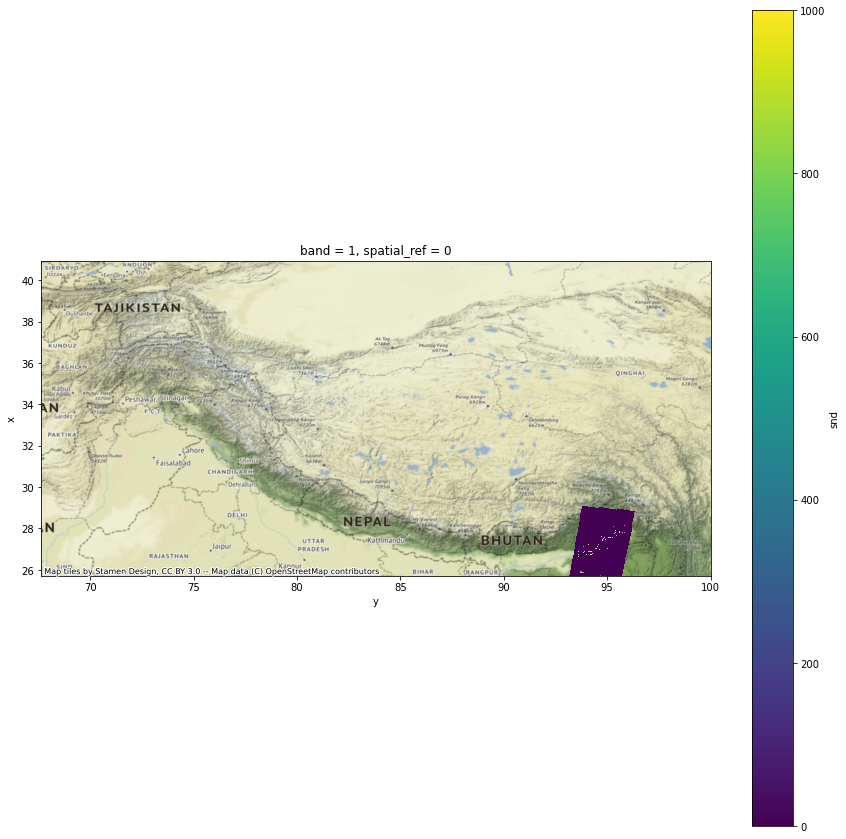

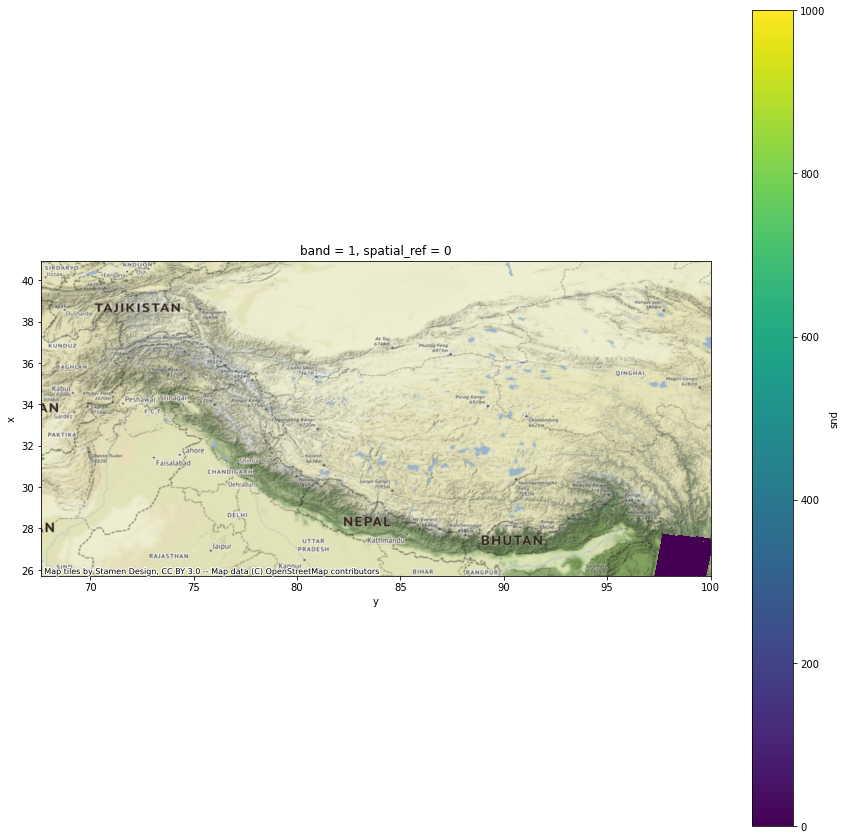

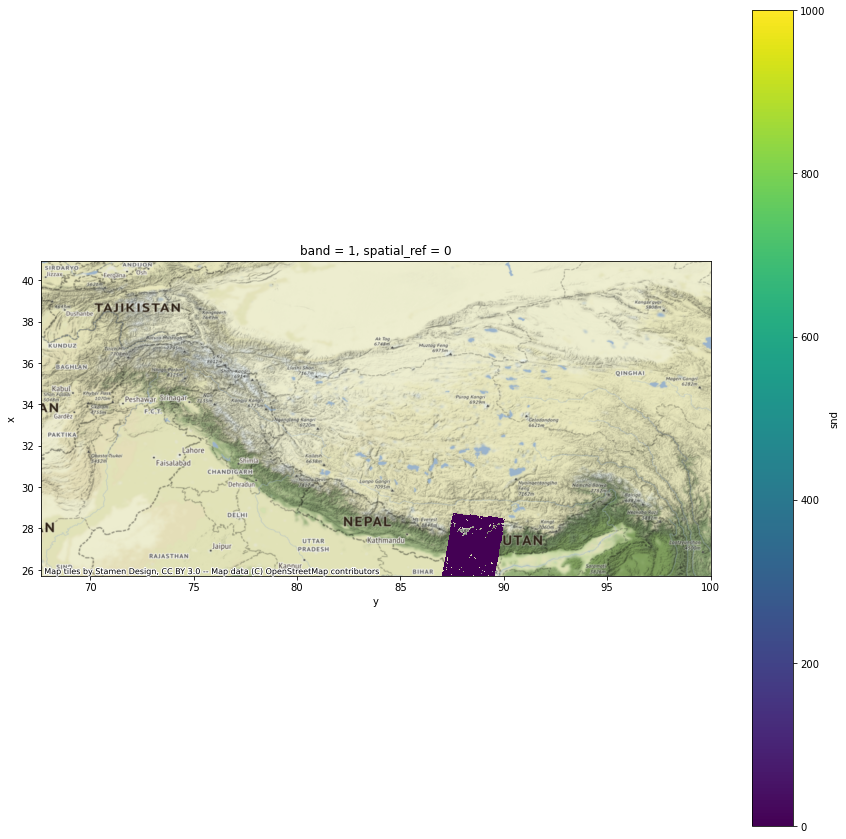

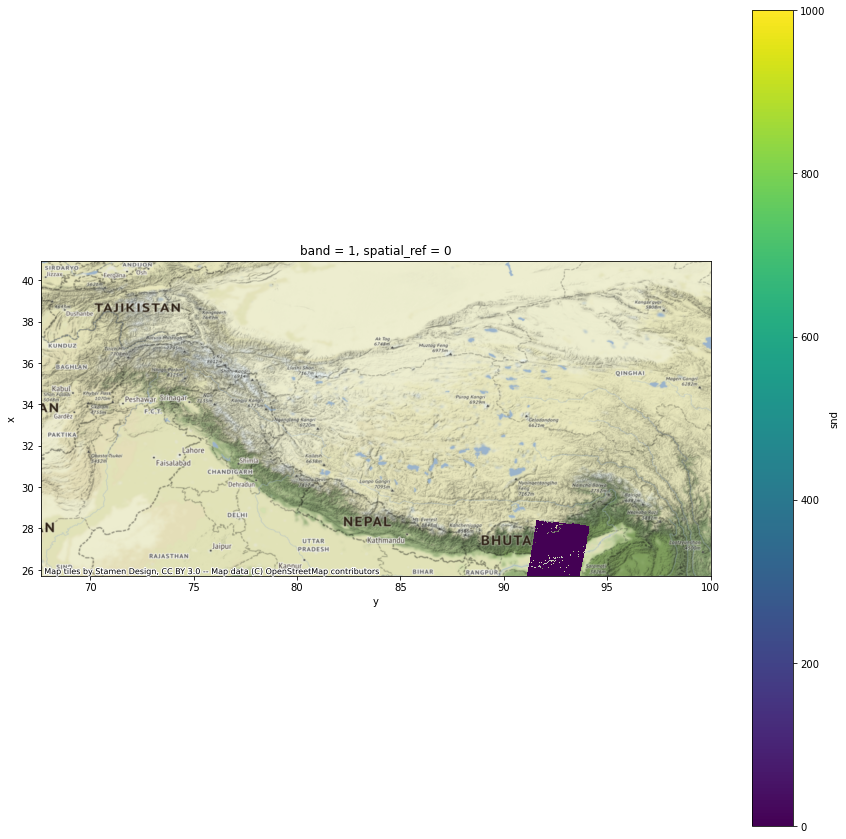

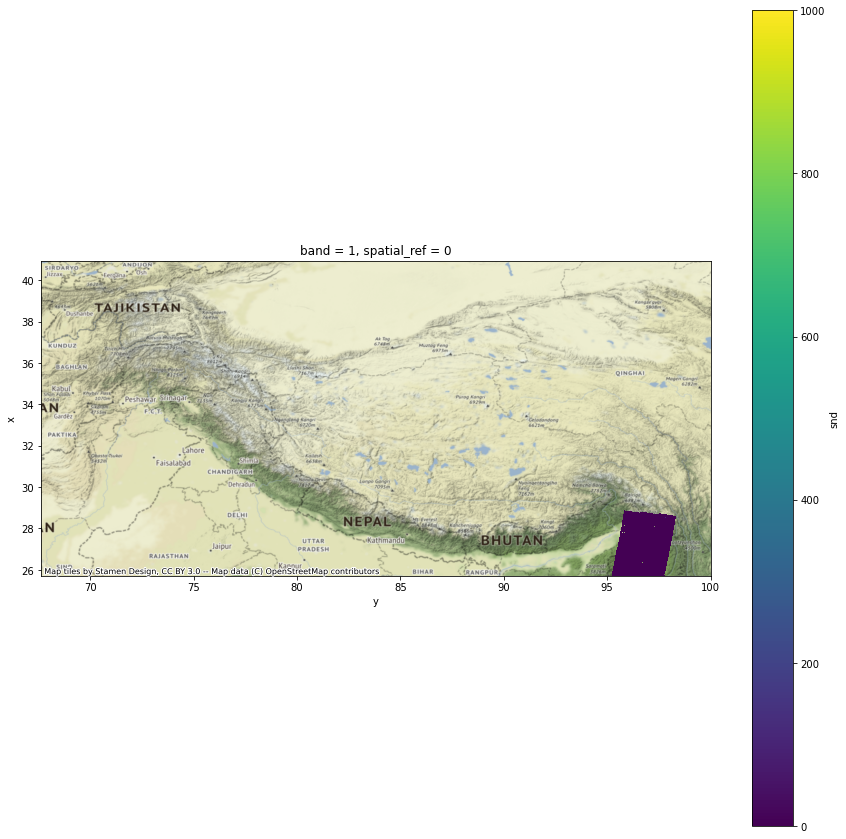

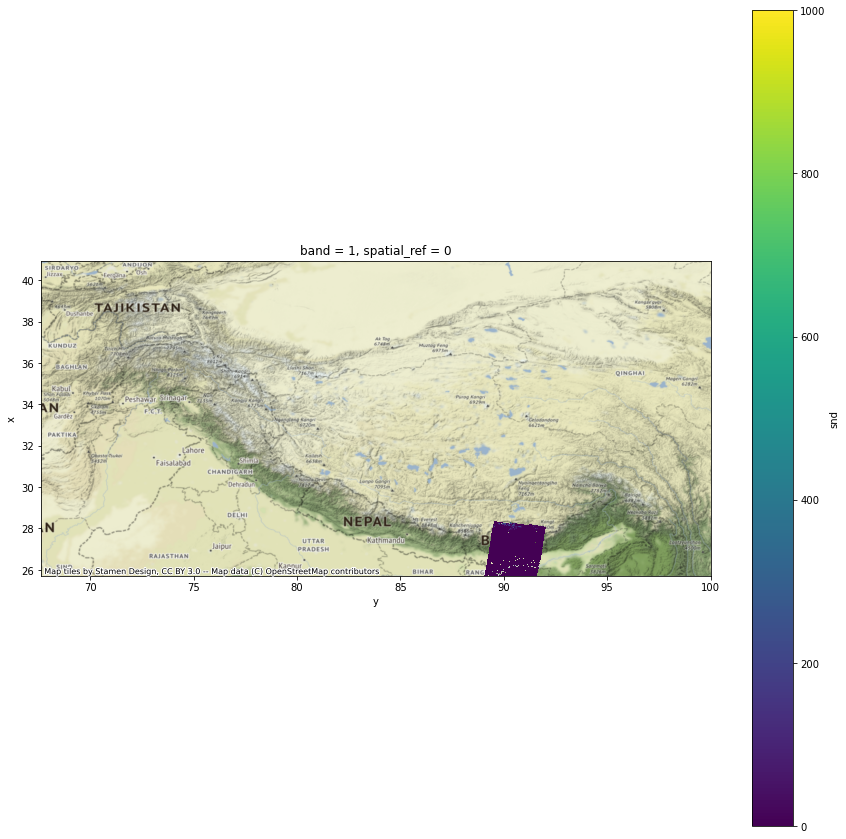

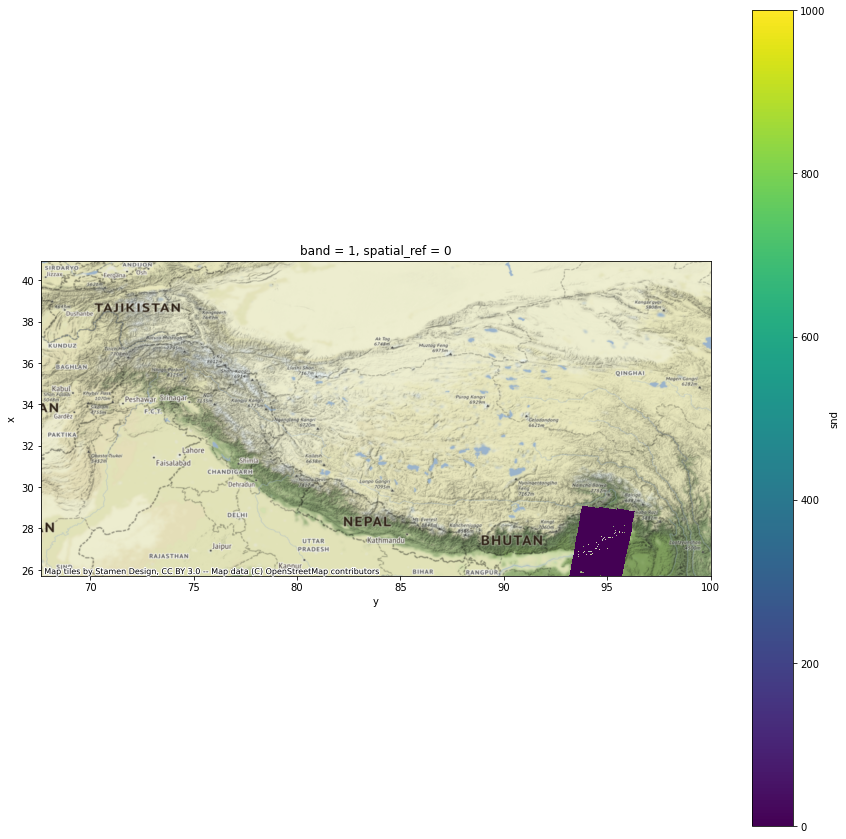

In [4]:
for fn in fns:
    snd = rxr.open_rasterio(fn,masked=True)
    snd=snd.transpose()
    snd_mm=snd*1000
    snd_mm = snd_mm.rio.set_crs('EPSG:4326')
    
    f,ax=plt.subplots(figsize=(15,15), sharex=True)
    snd_mm['snd'].plot(ax=ax,vmin=0,vmax=1000)
    ctx.add_basemap(ax=ax, crs=snd_mm.rio.crs, source=ctx.providers.Stamen.Terrain)

## Converting NETCDF to TIFF

In [17]:
xds = xr.open_dataset('/Users/bareeramirza/Downloads/Netcdffiles/snd_20160807.nc')
xds_tr=xds.transpose()
xds_tr.rio.write_crs("epsg:4326", inplace=True)


<xarray.Dataset>
Dimensions:      (lon: 6528, lat: 3072)
Coordinates:
  * lon          (lon) float64 67.62 67.63 67.63 67.64 ... 99.99 99.99 100.0
  * lat          (lat) float64 40.95 40.94 40.94 40.94 ... 25.73 25.72 25.72
    spatial_ref  int64 0
Data variables:
    snd          (lat, lon) float32 ...
    wet          (lat, lon) float32 ...

In [19]:
xds_tr["snd"].rio.to_raster('/Users/bareeramirza/Downloads/Netcdffiles/snd_20160807.tif')


## Clipping Dataset

In [69]:
xds_tiff = rxr.open_rasterio('/Users/bareeramirza/Downloads/Netcdffiles/snd_20160807.tif',masked=True)
xds_tiff = xds_tiff.rio.set_crs('EPSG:4326')
xds_trans=xds_tiff.transpose()

<xarray.DataArray (x: 6528, y: 3072, band: 1)>
[20054016 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 67.62 67.63 67.63 67.64 ... 99.98 99.99 99.99 100.0
  * y            (y) float64 40.95 40.94 40.94 40.94 ... 25.73 25.73 25.72 25.72
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    long_name:      Snow_Depth
    standard_name:  Snow_Depth
    units:          m
    scale_factor:   1.0
    add_offset:     0.0

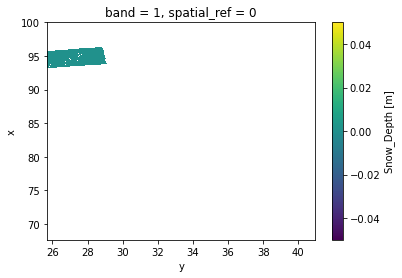

In [70]:
xds_trans.plot()
xds_trans

In [73]:
geometries = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [93, 25.716766],
            [93.5, 25.721726],
            [94, 25.726687],
            [95, 28],
            [94, 29]
        ]]
    }
]
clipped = xds_trans.rio.clip(geometries)

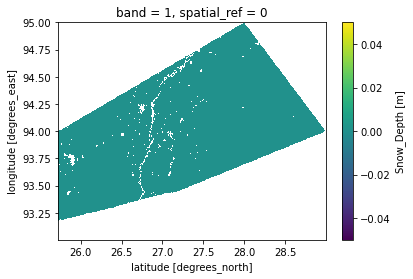

In [81]:
clipped.plot()